# Data Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gmean
import seaborn as sns

# importing data
untidy = pd.read_csv("smallerdataset.csv")
untidy = untidy[1:]

In [2]:
# transposing to wide data format rather than long
untidy = untidy.transpose()

In [3]:
# Creating a list of housekeeping genes
class_name = untidy.loc["Class Name"]
housekeeping_indices = class_name.index[class_name == "Housekeeping"]
housekeeping_genes = list(untidy.loc["Probe Name"][housekeeping_indices])

In [4]:
# Creating lists of negative and positive controls, respectively
neg_indices = class_name.index[class_name == "Negative"]
negative_controls = list(untidy.loc["Probe Name"][neg_indices])

pos_indices = class_name.index[class_name == "Positive"]
positive_controls = list(untidy.loc["Probe Name"][pos_indices])

In [5]:
# Reformatting aspects of the dataframe
# first, setting column names to the gene names
new_header = untidy.iloc[0]
untidy.columns = new_header

# second, removing non-sample rows
untidy = untidy[3:]

# reformatting sample names to match annotations (to make merging the two tables easier)
untidy.index = untidy.index.str.replace(" ",".")

# QC

I exported imaging QC, binding density QC, positive linearity QC, limit of detection QC metrics from the nSolver software.

In [16]:
qctable = pd.read_csv("initQC.csv")
qctable

,File Name,Imaging QC,Binding Density QC,Positive Control Linearity QC,Limit of Detection QC of mRNA
0,20190605_208512911220_OnCode 1_01.RCC,0.94,0.87,1.00,17.76
1,20190605_208512911220_Oncode 11_03.RCC,0.95,0.69,1.00,19.23
2,20190605_208512911220_Oncode 12_04.RCC,0.94,1.43,0.99,24.56
3,20190605_208512911220_Oncode 14_05.RCC,0.95,0.81,1.00,22.59
4,20190605_208512911220_Oncode 16_06.RCC,0.93,1.71,1.00,25.46
5,20190605_208512911220_Oncode 21_07.RCC,0.93,1.87,0.99,31.79
6,20190605_208512911220_Oncode 23_08.RCC,0.93,1.76,1.00,25.08
7,20190605_208512911220_Oncode 24 _09.RCC,0.94,1.04,1.00,26.01
8,20190605_208512911220_Oncode 26_10.RCC,0.93,1.27,1.00,25.31
9,20190605_208512911220_Oncode 27_11.RCC,0.95,1.12,0.99,29.50


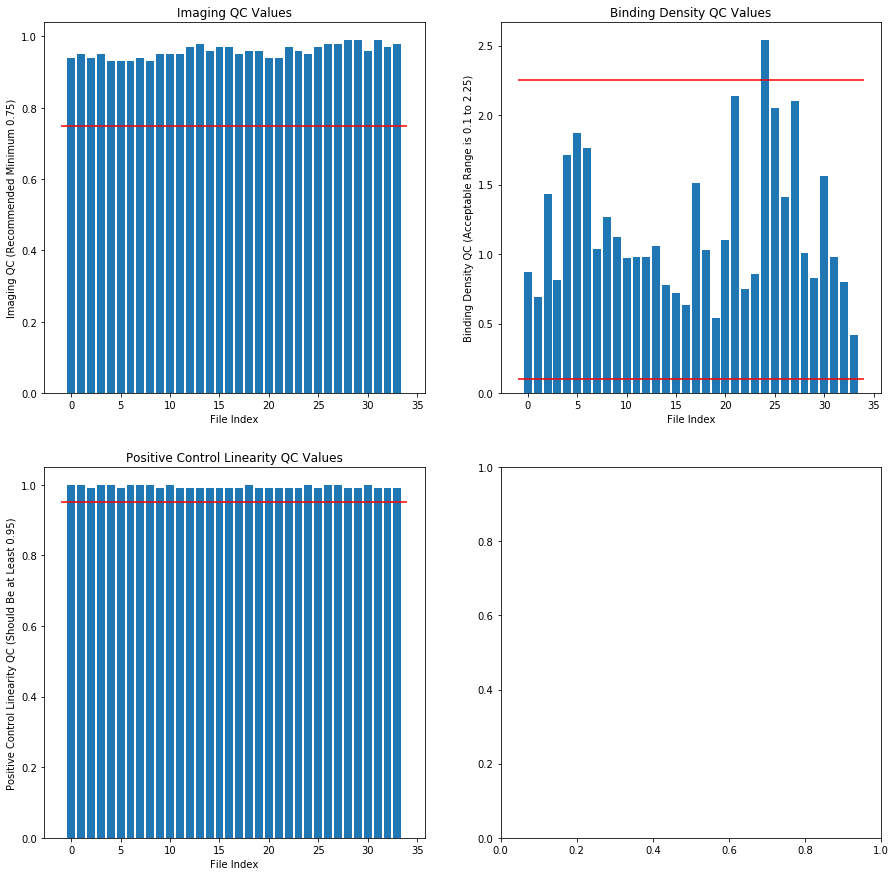

In [52]:
f, ax = plt.subplots(2,2,figsize=(15,15))

indices = range(len(qctable["File Name"]))

# creating top-left plot for imaging QC
ax[0, 0].bar(num_indices, qctable["Imaging QC"])
ax[0, 0].set_title("Imaging QC Values")
ax[0, 0].set_xlabel("File Index")
ax[0, 0].set_ylabel("Imaging QC (Recommended Minimum 0.75)")
ax[0, 0].hlines(0.75, -1, len(indices), color ="red")

ax[0, 1].bar(num_indices, qctable["Binding Density QC"])
ax[0, 1].set_title("Binding Density QC Values")
ax[0, 1].set_xlabel("File Index")
ax[0, 1].set_ylabel("Binding Density QC (Acceptable Range is 0.1 to 2.25)")
ax[0, 1].hlines([0.1, 2.25],-1, len(indices), color ="red")

# Creating bottom-left plot for Positive Control Linearity QC
ax[1, 0].bar(num_indices, qctable["Positive Control Linearity QC"])
ax[1, 0].set_title("Positive Control Linearity QC Values")
ax[1, 0].set_xlabel("File Index")
ax[1, 0].set_ylabel("Positive Control Linearity QC (Should Be at Least 0.95)")
ax[1, 0].hlines(0.95, -1, len(indices), color ="red")

# Creating bottom-left plot for Positive Control Linearity QC
ax[1, 0].bar(num_indices, qctable["Positive Control Linearity QC"])
ax[1, 0].set_title("Positive Control Linearity QC Values")
ax[1, 0].set_xlabel("File Index")
ax[1, 0].set_ylabel("Positive Control Linearity QC (Should Be at Least 0.95)")
ax[1, 0].hlines(0.95, -1, len(indices), color ="red")

plt.show()